In [118]:
import pandas as pd
from pprint import pprint as pp
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis

# Data Cleaning and Pre-Processing

In [3]:
#loading the data and check how does it look like
crowdstorming_df = pd.read_csv('Data/CrowdstormingDataJuly1st.csv')
crowdstorming_df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
crowdstorming_df.shape

(146028, 28)

In [5]:
#crowdstorming_df.describe()
crowdstorming_df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool

From the description, we can conclude the following:
* There are missing values on rater1, rater2 and photoID and since our goal is to build a classifier based on those labels we decided to drop rows with nan values for those columns. 
* There are missing values in height, weight. A tentative solution is to replace those values by average heights and weights of people who belong to the same leagueCountry or people with same position (for e.g: goalkeeper is usually taller), but it is safe to do it and we don't have a lot of missing values. So, we decided to drop them.
* There are missing values for Alpha_3, meanIAT, nIAT, seIAT, meanExp, nExp, seExp. Those we also decided to drop.

In [6]:
crowdstorming_df = crowdstorming_df.dropna()

## Aggregating player-referee information by player

In [7]:
f = {'club':'first',
     'leagueCountry':'first',
     'birthday':'first',
     'height':'first', 
     'weight':'first',
     'games': 'sum', 
     'victories':'sum',
     'ties': 'sum',
     'defeats': 'sum', 
     'goals': 'sum', 
     'yellowCards': 'sum', 
     'yellowReds': 'sum', 
     'redCards': 'sum',
     'photoID':'first',
     'position':'first',
     'refNum':'first',
     'refCountry':'first',
     'Alpha_3':'first',
     'meanIAT':'mean',
     'nIAT':'mean', 
     'seIAT':'mean',
     'meanExp': 'mean',
     'nExp':'mean', 
     'seExp':'mean',
     'rater1':'mean',
     'rater2':'mean'
    }
crowdstorming_df_player_agg = crowdstorming_df.groupby(['playerShort']).agg(f)

# Encoding Categorical to Numerical Values

Since we want to use RandomForest Classifier, we need to convert all columns with categorical values into numerical values. Let's check for the categorical features:

In [8]:
crowdstorming_df_player_agg.dtypes

rater1           float64
height           float64
yellowCards        int64
yellowReds         int64
seIAT            float64
club              object
nExp             float64
position          object
weight           float64
birthday          object
meanIAT          float64
defeats            int64
seExp            float64
Alpha_3           object
photoID           object
goals              int64
rater2           float64
refNum             int64
leagueCountry     object
games              int64
refCountry         int64
nIAT             float64
ties               int64
redCards           int64
victories          int64
meanExp          float64
dtype: object

From the description above, the set of categorical features include:
* club
* leagueCountry
* birthday 
* position 
* Alpha_3

In [9]:
le = preprocessing.LabelEncoder()

crowdstorming_df_num = crowdstorming_df_player_agg 

# Converting club String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['club'])))
crowdstorming_df_num['club'] = le.transform(crowdstorming_df_player_agg['club']) 


# Converting leagueCountry String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['leagueCountry'])))
crowdstorming_df_num['leagueCountry'] = le.transform(crowdstorming_df_player_agg['leagueCountry']) 

# Converting birthday String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['birthday'])))
crowdstorming_df_num['birthday'] = le.transform(crowdstorming_df_player_agg['birthday']) 


# Converting position String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['position'])))
crowdstorming_df_num['position'] = le.transform(crowdstorming_df_player_agg['position']) 

# Converting position String to numerical representation
le.fit(list(set(crowdstorming_df_player_agg['Alpha_3'])))
crowdstorming_df_num['Alpha_3'] = le.transform(crowdstorming_df_player_agg['Alpha_3']) 

## Binary & Multi-Class Classification Labels

In [10]:
# Averaging over rater1 and rater2: 
crowdstorming_df_num['meanRating'] = (crowdstorming_df_num['rater1'] + crowdstorming_df_num['rater2'])/2
# Create Categories for Binary Classification
def binaryColor(x):
    if x < 0.5: 
        return 0
    else: 
        return 1
crowdstorming_df_num['BinaryColorClass'] = crowdstorming_df_num['meanRating'].apply(binaryColor) 

# Create Categories for Multi Classification
def multiColor(x):
    if x < 0.25: 
        return 0
    elif 0.25 <= x <0.5: 
        return 1
    elif 0.5 <= x < 0.75:
        return 2
    elif 0.75 <= x <= 1:
        return 3
crowdstorming_df_num['MultiColorClass'] = crowdstorming_df_num['meanRating'].apply(multiColor) 

In [11]:
features_player = ['weight', 'nExp', 'height', 'meanExp', 'yellowReds',
       'leagueCountry', 'club', 'victories', 'seExp', 'Alpha_3',
       'yellowCards', 'nIAT', 'birthday', 'goals', 'ties',
       'defeats','games','position', 'redCards']
features_referee = ['meanIAT', 'refCountry', 'refNum', 'seIAT']
X = crowdstorming_df_num [features_player]
y_binary = crowdstorming_df_num ['BinaryColorClass']
y_multi = crowdstorming_df_num ['MultiColorClass']

# 1. Supervised Learning

## 1.1. Binary Classification

In this section, we are building a classifer that can predict the skin color of the player, so let's have a look at the skin color distribution.

In [13]:
crowdstorming_df_num['BinaryColorClass'].value_counts()

0    1089
1     330
Name: BinaryColorClass, dtype: int64

Clearly we have a imbalance issue here! we should keep this point in oue mind for later analysis and model evaluation.. 

### Splitting data into train and test

In [14]:
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X,y_binary, test_size=0.3)

In [15]:
# Fit a random forest to the training data for binary classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier() # , class_weight='balanced')

forest_binary = forest.fit(X_train, y_train_binary) #, sample_weight= sample_weights)

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Now we want to predict and calculate the accuracy for train binary classification.

In order to evaluate the model and since the data is unbalanced, we will not use the accuracy alon, we will be using precision and recall, and a f1_score which is a commbination of both recall and precision. also we will look at the confusion_matrix

In [73]:
result_binary_train = forest_binary.predict(X_train)
print('Accuracy Score: ',metrics.accuracy_score(y_train_binary, result_binary_train))
print('Precision Score: ',metrics.precision_score(y_train_binary, result_binary_train))
print('Recall Score: ',metrics.recall_score(y_train_binary, result_binary_train))
print('f1_score: ',metrics.f1_score(y_train_binary, result_binary_train))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

Accuracy Score:  0.983887210473
Precision Score:  0.995260663507
Recall Score:  0.933333333333
f1_score:  0.963302752294
roc_auc_score:  0.579839786382


In [74]:
cm=metrics.confusion_matrix(y_train_binary, result_binary_train)
print(cm)

[[767   1]
 [ 15 210]]


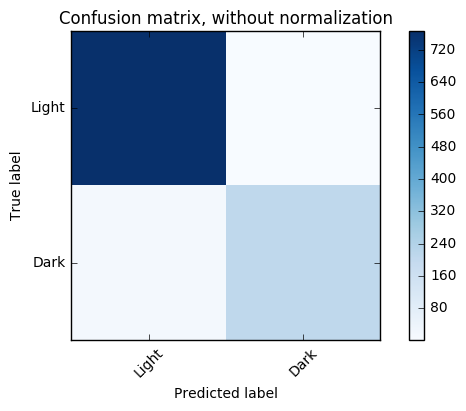

In [75]:
plot_confusion_matrix(cm, classes=['Light','Dark'],
                      title='Confusion matrix, without normalization')

Now we want to predict and calculate the accuracy for test binary classification.

In [76]:
result_binary_test = forest_binary.predict(X_test)
print('Accuracy Score: ',metrics.accuracy_score(y_test_binary, result_binary_test))
print('Precision Score: ',metrics.precision_score(y_test_binary, result_binary_test))
print('Recall Score: ',metrics.recall_score(y_test_binary, result_binary_test))
print('f1_score: ',metrics.f1_score(y_test_binary, result_binary_test))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

Accuracy Score:  0.774647887324
Precision Score:  0.615384615385
Recall Score:  0.228571428571
f1_score:  0.333333333333
roc_auc_score:  0.590921228304


In [77]:
cm=metrics.confusion_matrix(y_test_binary, result_binary_test)
print(cm)

[[306  15]
 [ 81  24]]


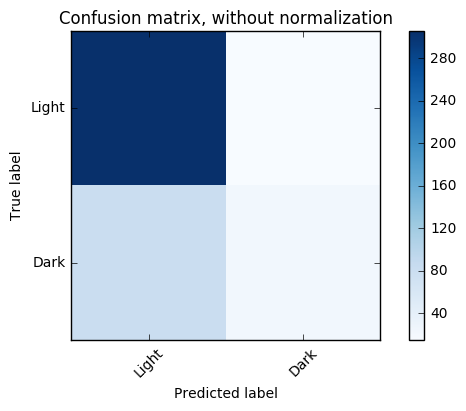

In [78]:
plot_confusion_matrix(cm, classes=['Light','Dark'],
                      title='Confusion matrix, without normalization')

From the confusion matrix above we see that the classifier does a good job in predicting light color skin plyers but the performance is really poor when it comes to predicitng plyers with dark skin color!

Here we show how different parameters passed to the Classifier affect the overfitting issue. also we perform cross-validation to mitigate this issue!

In [113]:
forest = RandomForestClassifier(n_estimators=10, max_depth=7)
forest_binary = forest.fit(X_train, y_train_binary) 

result_binary_train = forest_binary.predict(X_train)
print('Training Score')
print('Accuracy Score: ',metrics.accuracy_score(y_train_binary, result_binary_train))
#print('Precision Score: ',metrics.precision_score(y_train_binary, result_binary_train))
#print('Recall Score: ',metrics.recall_score(y_train_binary, result_binary_train))
print('f1_score: ',metrics.f1_score(y_train_binary, result_binary_train))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

print('------------')

result_binary_test = forest_binary.predict(X_test)
print('Resting Score')
print('Accuracy Score: ',metrics.accuracy_score(y_test_binary, result_binary_test))
#print('Precision Score: ',metrics.precision_score(y_test_binary, result_binary_test))
#print('Recall Score: ',metrics.recall_score(y_test_binary, result_binary_test))
print('f1_score: ',metrics.f1_score(y_test_binary, result_binary_test))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

Training Score
Accuracy Score:  0.861027190332
f1_score:  0.56050955414
roc_auc_score:  0.582688028482
------------
Resting Score
Accuracy Score:  0.776995305164
f1_score:  0.306569343066
roc_auc_score:  0.582866043614


In [114]:
forest = RandomForestClassifier(n_estimators=100, max_depth=75)
forest_binary = forest.fit(X_train, y_train_binary) 

result_binary_train = forest_binary.predict(X_train)
print('Training Score')
print('Accuracy Score: ',metrics.accuracy_score(y_train_binary, result_binary_train))
#print('Precision Score: ',metrics.precision_score(y_train_binary, result_binary_train))
#print('Recall Score: ',metrics.recall_score(y_train_binary, result_binary_train))
print('f1_score: ',metrics.f1_score(y_train_binary, result_binary_train))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

print('------------')

result_binary_test = forest_binary.predict(X_test)
print('Resting Score')
print('Accuracy Score: ',metrics.accuracy_score(y_test_binary, result_binary_test))
#print('Precision Score: ',metrics.precision_score(y_test_binary, result_binary_test))
#print('Recall Score: ',metrics.recall_score(y_test_binary, result_binary_test))
print('f1_score: ',metrics.f1_score(y_test_binary, result_binary_test))
print('roc_auc_score: ',metrics.roc_auc_score(y_test_binary, result_binary_test))

Training Score
Accuracy Score:  1.0
f1_score:  1.0
roc_auc_score:  0.582866043614
------------
Resting Score
Accuracy Score:  0.798122065728
f1_score:  0.385714285714
roc_auc_score:  0.616110369381


From the results above we see that, adding more n_estimator  and max_depth will lead to a complex model and this leads to overfitting

Now we perform cross-validation to mitigate this issue!

### K-Fold Cross Validation

In [127]:
from sklearn.cross_validation import cross_val_score

forest = RandomForestClassifier(n_estimators=100, max_depth=75)

forest_binary = forest.fit(X_train, y_train_binary) #, sample_weight= sample_weights)
scores_binary_accuracy = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='accuracy')
scores_binary_f1 = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='f1')
scores_binary_roc_auc = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='roc_auc')

print('Accuracy Score: ',scores_binary_accuracy.mean())
#print('Precision Score: ',metrics.precision_score(y_test_binary, result_binary_test))
#print('Recall Score: ',metrics.recall_score(y_test_binary, result_binary_test))
print('f1_score: ', scores_binary_f1.mean())
print('roc_auc_score: ', scores_binary_roc_auc.mean())


Accuracy Score:  0.801278593547
f1_score:  0.377069063847
roc_auc_score:  0.744485502322


## Choosing the parameters of the model

10 trees
accuracy score 0.780846069324
f1 score 0.316616231327
roc_auc score 0.698322547596
---------------------
30 trees
accuracy score 0.809030066926
f1 score 0.348423529573
roc_auc score 0.72796800832
---------------------
50 trees
accuracy score 0.801977824393
f1 score 0.357875477717
roc_auc score 0.73894912427
---------------------
100 trees
accuracy score 0.797747477774
f1 score 0.358276380747
roc_auc score 0.741352361536
---------------------
200 trees
accuracy score 0.799860153831
f1 score 0.345157717525
roc_auc score 0.740779353165
---------------------
500 trees
accuracy score 0.80409050045
f1 score 0.375748715053
roc_auc score 0.745208713022
---------------------
1000 trees
accuracy score 0.804794725802
f1 score 0.37496327058
roc_auc score 0.749667675738
---------------------
2000 trees
accuracy score 0.802682049745
f1 score 0.367392845173
roc_auc score 0.749275244803
---------------------


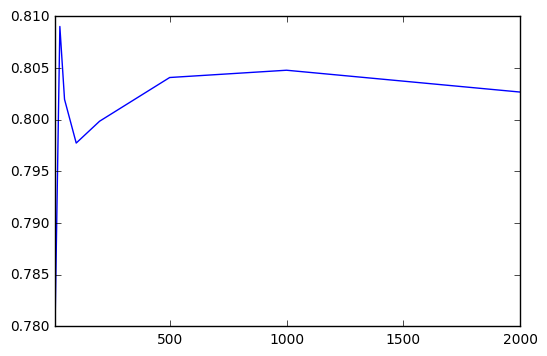

In [132]:
results_accuracy=[]
results_f1=[]
results_roc_auc=[]

n_estimator_options=[10,30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestClassifier(n_estimators=trees)
    scores_binary_accuracy = cross_val_score(model,  X, y_binary, cv=10, scoring='accuracy')
    scores_binary_f1 = cross_val_score(model,  X, y_binary, cv=10, scoring='f1')
    scores_binary_roc_auc = cross_val_score(model,  X, y_binary, cv=10, scoring='roc_auc')


    print(trees,'trees')
    print('accuracy score', scores_binary_accuracy.mean())
    results_accuracy.append(scores_binary_accuracy.mean())
    
    print('f1 score', scores_binary_f1.mean())
    results_f1.append(scores_binary_f1.mean())
    
    print('roc_auc score', scores_binary_roc_auc.mean())
    results_roc_auc.append(scores_binary_roc_auc.mean())
    
    print('---------------------')
    
pd.Series(results_accuracy, n_estimator_options).plot()



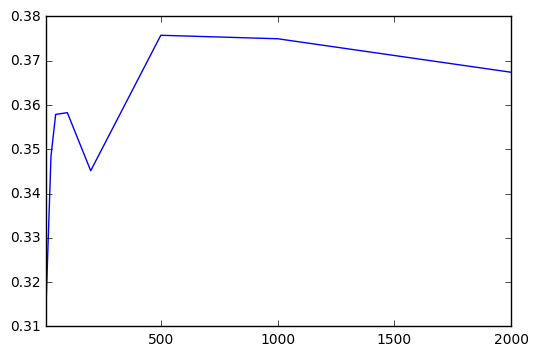

In [133]:
pd.Series(results_f1, n_estimator_options).plot()


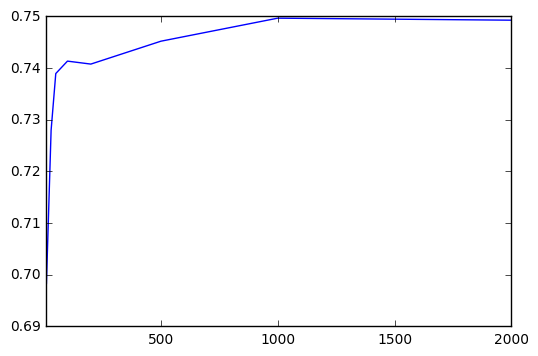

In [134]:
pd.Series(results_roc_auc, n_estimator_options).plot() 

2000 trees
accuracy score 0.783657976226
f1 score 0.310499455663
roc_auc score 0.684087948805
---------------------
2000 trees
accuracy score 0.790010987913
f1 score 0.397351136425
roc_auc score 0.694968028913
---------------------
2000 trees
accuracy score 0.791424433124
f1 score 0.374419250752
roc_auc score 0.716866035482
---------------------
2000 trees
accuracy score 0.794241334532
f1 score 0.350679848582
roc_auc score 0.720327253164
---------------------
2000 trees
accuracy score 0.794241334532
f1 score 0.37480270793
roc_auc score 0.718722906949
---------------------
2000 trees
accuracy score 0.793517131156
f1 score 0.349860231023
roc_auc score 0.732620290571
---------------------
2000 trees
accuracy score 0.787863350315
f1 score 0.358084839809
roc_auc score 0.712524325827
---------------------
2000 trees
accuracy score 0.789301768055
f1 score 0.336962199
roc_auc score 0.726730866257
---------------------
2000 trees
accuracy score 0.791399460593
f1 score 0.334754975161
roc_auc sco

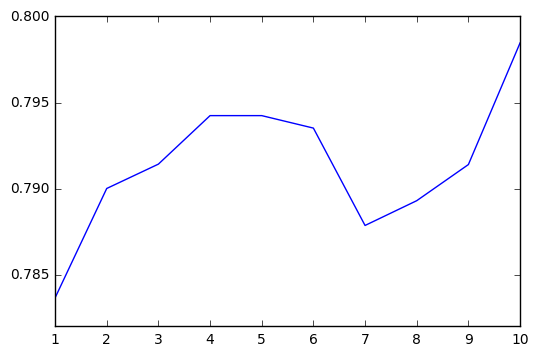

In [136]:
results_accuracy=[]
results_f1=[]
results_roc_auc=[]

min_samples_leaf_options=[1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(min_samples_leaf=min_samples)
    scores_binary_accuracy = cross_val_score(model,  X, y_binary, cv=10, scoring='accuracy')
    scores_binary_f1 = cross_val_score(model,  X, y_binary, cv=10, scoring='f1')
    scores_binary_roc_auc = cross_val_score(model,  X, y_binary, cv=10, scoring='roc_auc')


    print(trees,'trees')
    print('accuracy score', scores_binary_accuracy.mean())
    results_accuracy.append(scores_binary_accuracy.mean())
    
    print('f1 score', scores_binary_f1.mean())
    results_f1.append(scores_binary_f1.mean())
    
    print('roc_auc score', scores_binary_roc_auc.mean())
    results_roc_auc.append(scores_binary_roc_auc.mean())
    
    print('---------------------')
    
pd.Series(results_accuracy, min_samples_leaf_options).plot()



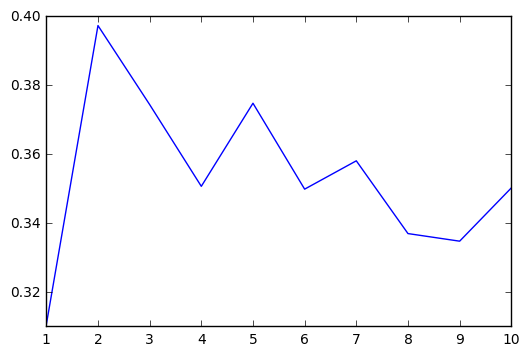

In [138]:
pd.Series(results_f1, min_samples_leaf_options).plot()


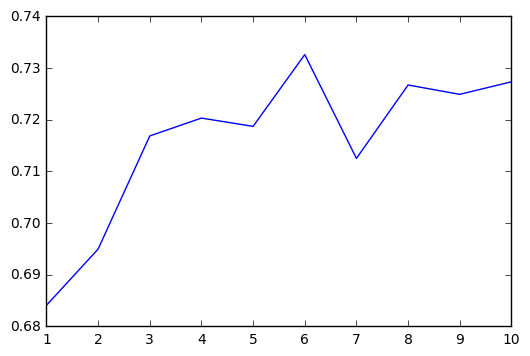

In [139]:
pd.Series(results_roc_auc, min_samples_leaf_options).plot()

In [24]:
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=6)
forest_binary = model.fit(X_train, y_train_binary) #, sample_weight= sample_weights)
scores_binary = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='accuracy')
scores_binary.mean()

0.80056437918289869

/home/meryem/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


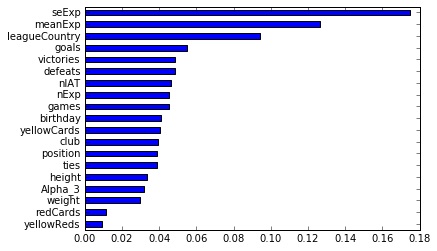

In [25]:
feature_importance= pd.Series(model.feature_importances_,index=X.columns)
feature_importance.sort()
feature_importance.plot(kind='barh')

## Bonus Part

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, learning_curve
import numpy as np

In [27]:
def plot_learning_curve(estimator,X,Y,cv=20):
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=cv, train_sizes=np.linspace(0.2,1,20))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
            label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

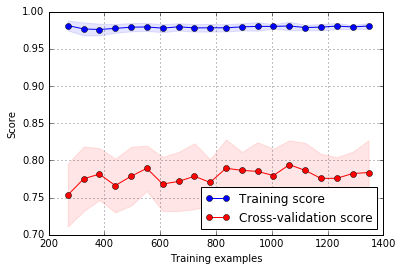

In [28]:
estimator = RandomForestClassifier()    

plot_learning_curve(estimator,X,y_binary)   


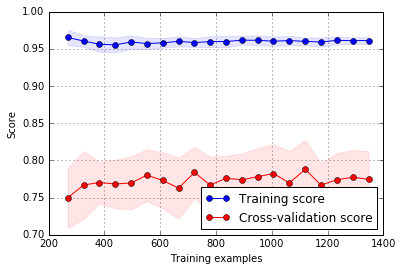

In [68]:
estimator = RandomForestClassifier(n_estimators = 6, max_features = 10)    
plot_learning_curve(estimator,X,y_binary)   

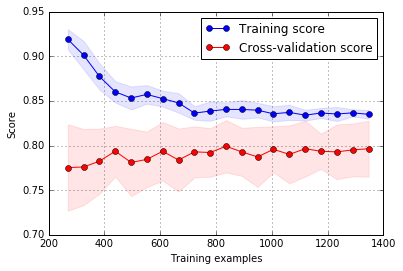

In [59]:
estimator = RandomForestClassifier(max_depth = )    
plot_learning_curve(estimator,X,y_binary)   

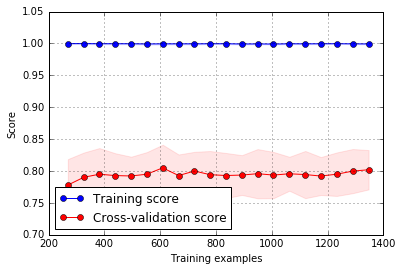

In [66]:
estimator = RandomForestClassifier(n_estimators=50)    
plot_learning_curve(estimator,X,y_binary)  

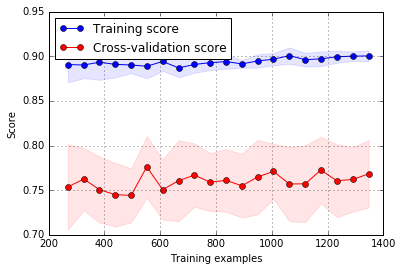

In [67]:
estimator = RandomForestClassifier(n_estimators=2)    
plot_learning_curve(estimator,X,y_binary)   

## 1.2. Multi-Class Classification

### Splitting data into train and test

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_multi, y_test_multi = train_test_split(X,y_multi, test_size=0.3)

In [53]:
# Fit a random forest to the training data for multi-class classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 10 )

forest_multi = forest.fit(X_train, y_train_multi)

### Calculating the accuracy of the model

In [54]:
from sklearn import metrics
result_multi_train = forest_multi.predict(X_train)
print(metrics.accuracy_score(y_train_multi, result_multi_train))

0.98690835851


In [55]:
from sklearn import metrics
result_multi_test = forest_multi.predict(X_test)
print(metrics.accuracy_score(y_test_multi, result_multi_test))

0.476525821596


In [56]:
area_under_curve (y_test_multi, result_multi_test)

0.3205128205128205

# 2. Unsupervised Learning

In [70]:
import pandas as pd
import numpy as np
 
crowdstorming_df['skin'] = crowdstorming_df[['rater1', 'rater2']].mean(axis=1)
crowdstorming_df = crowdstorming_df.drop(['rater1', 'rater2'], axis=1)

In [72]:
#df.fillna(df.mean()).dropna(axis=1, how='all')
for _col_name_ in ['height', 'weight','meanIAT','nIAT','seIAT']:
    crowdstorming_df[_col_name_] = crowdstorming_df[_col_name_].fillna(crowdstorming_df[_col_name_].mean())

In [73]:
f = {
    #'club':'first',
    #'birthday':'first',
    'height':'first', 
    'weight':'first',
    'games': 'sum', 
    'victories':'sum',
    'ties': 'sum',
    'defeats': 'sum', 
    'goals': 'sum', 
    'yellowCards': 'sum', 
    'yellowReds': 'sum', 
    'redCards': 'sum',
    #'position':'first',
    #'refNum':'first',
    #'refCountry':'first',
    'meanIAT':'mean',
    'nIAT':'mean', 
    'seIAT':'mean',
    'meanExp': 'mean',
    'nExp':'mean', 
    'seExp':'mean',
    #'rater1':'mean',
    #'rater2':'mean'
    #'skin':'mean',
    'leagueCountry':'first'
}

#df_aggr = df.groupby(['playerShort']).agg(f)
df_grouped = crowdstorming_df.groupby(['playerShort'])

df_skin = df_grouped.agg({'skin': 'mean'})
df_skin['actual_skin'] = np.where(df_skin['skin'] > 0.5, 1,0)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


scale = StandardScaler()

def sil_score(df_aggr):
    df_aggr_scaled = scale.fit_transform(df_aggr.as_matrix())
    kmeans_model = KMeans(n_clusters=2, random_state=0).fit(df_aggr_scaled)
    labels = kmeans_model.labels_
    return labels, silhouette_score(df_aggr_scaled, labels)

In [75]:
for i in reversed(range(1,len(f.items()))):
    combination = dict(list(f.items())[:i])
    _df_aggregated = df_grouped.agg(dict(combination))
    _df_aggregated = pd.get_dummies(_df_aggregated)
    
    labeled, score = sil_score(_df_aggregated)
    cluster_0 = df_skin[labeled == 0]
    cluster_1 = df_skin[labeled == 1]
    
    print("FIRST CLUSTER: ", cluster_0['skin'].mean(),len(cluster_0))
    print("SCND  CLUSTER: ", cluster_1['skin'].mean(),len(cluster_1))
    
    cluster_0_whites = len(cluster_0[cluster_0['skin'] > 0.5])
    cluster_0_blacks = len(cluster_0[cluster_0['skin'] <= 0.5])
    
    cluster_1_whites = len(cluster_1[cluster_1['skin'] > 0.5])
    cluster_1_blacks = len(cluster_1[cluster_1['skin'] <= 0.5])
    
    print("CLUSTER 0: %d/%d = %%%d" % (cluster_0_whites, len(cluster_0), int(cluster_0_whites/len(cluster_0)*100)))
    print("CLUSTER 1: %d/%d = %%%d" % (cluster_1_whites, len(cluster_1), int(cluster_1_whites/len(cluster_1)*100)))

    
    print(score,_df_aggregated.columns)
    print(score)

('FIRST CLUSTER: ', 0.2981958762886598, 485)
('SCND  CLUSTER: ', 0.2747591006423983, 934)
CLUSTER 0: 80/485 = %16
CLUSTER 1: 147/934 = %15
(0.19402533146620338, Index([u'yellowReds', u'nIAT', u'nExp', u'height', u'victories', u'goals',
       u'ties', u'meanExp', u'weight', u'defeats', u'meanIAT', u'seIAT',
       u'games', u'seExp', u'redCards', u'leagueCountry_England',
       u'leagueCountry_France', u'leagueCountry_Germany',
       u'leagueCountry_Spain'],
      dtype='object'))
0.194025331466
('FIRST CLUSTER: ', 0.29473415132924335, 489)
('SCND  CLUSTER: ', 0.2764784946236559, 930)
CLUSTER 0: 80/489 = %16
CLUSTER 1: 147/930 = %15
(0.19686793277735637, Index([u'weight', u'yellowReds', u'defeats', u'meanIAT', u'nExp', u'height',
       u'victories', u'nIAT', u'seIAT', u'games', u'goals', u'ties',
       u'redCards', u'meanExp', u'leagueCountry_England',
       u'leagueCountry_France', u'leagueCountry_Germany',
       u'leagueCountry_Spain'],
      dtype='object'))
0.196867932777
('F

In [76]:
df_skin

,skin,actual_skin
playerShort,,
aaron-hughes,0.125,0
aaron-hunt,0.125,0
aaron-lennon,0.250,0
aaron-ramsey,0.000,0
abdelhamid-el-kaoutari,0.250,0
abdou-traore_2,0.750,1
abdoulaye-diallo_2,0.875,1
abdoulaye-keita_2,0.875,1
abdoulwhaid-sissoko,1.000,1
